## Final Project Submission

Please fill out:
* Student name: Ashley Heinke
* Student pace: full time
* Scheduled project review date/time: 1.27.23
* Instructor name: Brendan Hutchinson
* Blog post URL: 


In [ ]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [ ]:
!ls

# Bom Movie Gross

In [ ]:
gross_df = pd.read_csv('bom.movie_gross.csv')

In [ ]:
gross_df.info()

In [ ]:
gross_df.describe()

In [ ]:
gross_df

In [ ]:
gross_df.isna().sum()

In [ ]:
gross_df['studio'].value_counts(normalize=True)

In [ ]:
gross_df2 = gross_df.fillna(0)

In [ ]:
gross_df2.dtypes

In [ ]:
gross_df2['foreign_gross'] = gross_df2['foreign_gross'].str.replace(',','')

In [ ]:
data_types_dict = {'foreign_gross': float}
gross_df2 = gross_df2.astype(data_types_dict)

In [ ]:
gross_df2["total_gross"] = gross_df2["domestic_gross"] + gross_df2["foreign_gross"]
gross_df2

In [ ]:
gross_df2.nlargest(20,['total_gross'])

In [ ]:
studio_gross = gross_df2.groupby('studio')['total_gross'].mean()
studio_gross

In [ ]:
studio_gross2 = studio_gross.nlargest(20,)
studio_gross2

# Tn Movie Budgets

In [ ]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')

In [ ]:
budgets_df.info()

In [ ]:
budgets_df

In [ ]:
budgets_df.dtypes

In [ ]:
budgets_df['domestic_gross'] = (budgets_df['domestic_gross'].str.replace(',','').str.replace('$', '')).astype(float)

In [ ]:
data_types = {'domestic_gross': float}
budgets_df = budgets_df.astype(data_types)

In [ ]:
dom_gross = budgets_df.nlargest(20,['domestic_gross'])
dom_gross

In [ ]:
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].apply(lambda x: x.replace(',','').replace('$', ''))
budgets_df.head()

In [ ]:
data_types2 = {'worldwide_gross': float}
budgets_df = budgets_df.astype(data_types2)

In [ ]:
ww_gross = budgets_df.nlargest(20,['worldwide_gross'])
ww_gross

In [ ]:
budgets_df.dtypes

In [ ]:
scatter_plot_title = 'Relationship Between Worldwide Gross and Domestic Gross for Top 20 Movies Worldwide'
worldwide_gross_label = 'Worldwide Gross'
domestic_gross_label = 'Domestic Gross'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(
    x=ww_gross['worldwide_gross'],
    y=ww_gross['domestic_gross'],
    alpha=0.3
)

ax.set_xlabel(worldwide_gross_label)
ax.set_ylabel(domestic_gross_label)
ax.set_title(scatter_plot_title);

In [ ]:
scatter_plot_title = 'Relationship Between Worldwide Gross and Domestic Gross for Top 20 Movies Worldwide'
worldwide_gross_label = 'Worldwide Gross'
domestic_gross_label = 'Domestic Gross'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(
    x=budgets_df['worldwide_gross'],
    y=budgets_df['domestic_gross'],
    alpha=0.3
)

ax.set_xlabel(worldwide_gross_label)
ax.set_ylabel(domestic_gross_label)
ax.set_title(scatter_plot_title);

In [ ]:
budgets_df['production_budget'] = budgets_df['production_budget'].apply(lambda x: x.replace(',',''))

In [ ]:
budgets_df['production_budget'] = budgets_df['production_budget'].apply(lambda x: x.replace('$',''))
budgets_df.head()

In [ ]:
data_types3 = {'production_budget': float}
budgets_df = budgets_df.astype(data_types3)

In [ ]:
budgets_df["bud_gross_diff"] = budgets_df["worldwide_gross"] - budgets_df["production_budget"]
budgets_df

In [ ]:
top_profit = budgets_df.nlargest(20,['bud_gross_diff'])
top_profit

In [ ]:
least_profit = budgets_df.nsmallest(20,['bud_gross_diff'])
least_profit

In [ ]:
budgets_df2 = budgets_df.rename(columns={'movie': 'title'})
budgets_df2

In [ ]:
budgets_df2['year'] = pd.DatetimeIndex(budgets_df2['release_date']).year
budgets_df2

In [ ]:
movie_gg_df = pd.merge(budgets_df2, df3, how='inner', on=['title'])
movie_gg_df

In [ ]:
movie_gg_df.describe()

In [ ]:
movie_tp_df = movie_gg_df.nlargest(20,['bud_gross_diff'])
movie_tp_df

In [ ]:
movie_tp_df.describe()

In [ ]:
movie_gg_df2 = pd.merge(budgets_df2, df3, how='inner', on=['title', 'year'])
movie_gg_df2

In [ ]:
movie_tp_df2 = movie_gg_df2.nlargest(20,['bud_gross_diff'])
movie_tp_df2

In [ ]:
budgets_df2.head(1)

In [ ]:
df3.merge(budgets_df2, how = 'right', left_on = ['primary_title', 'start_year'], right_on = ['title', 'year'])

In [ ]:
movie_gg_df3 = pd.merge(budgets_df2, df3, how='outer', on=['title', 'year'])
movie_gg_df3

In [ ]:
movie_tp_df3 = movie_gg_df3.nlargest(20,['bud_gross_diff'])
movie_tp_df3

# Tmdb Movies (popularity)

In [ ]:
popularity_df = pd.read_csv('tmdb.movies.csv')

In [ ]:
popularity_df.info()

In [ ]:
popularity_df

In [ ]:
###
#genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}
#genre_id

# IMDB

In [ ]:
import sqlite3 
conn = sqlite3.connect('im.db')

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [ ]:
table_names = cur.fetchall()
table_names

In [ ]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [ ]:
q = """
SELECT *
FROM movie_basics
LEFT JOIN directors
    USING(movie_id)
;
"""
df = pd.read_sql(q, conn)

In [ ]:
df

In [ ]:
q = """
SELECT *
FROM persons
LEFT JOIN directors
    USING(person_id)
;
"""
df2 = pd.read_sql(q, conn)

In [ ]:
df2

In [ ]:
movie_df = pd.merge(df, df2, on="person_id")

In [ ]:
movie_df

In [ ]:
movie_df.drop_duplicates()

In [ ]:
q = """
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
;
"""
df3 = pd.read_sql(q, conn)

In [ ]:
df3[df3['primary_title'].str.startswith('Avat')]

In [ ]:
df3.isna().sum()

In [ ]:
df3.dropna(subset=['numvotes'], inplace=True)

In [ ]:
df3.isna().sum()

In [ ]:
df3.sort_values(by='runtime_minutes', ascending=False)[:20]

In [ ]:
df3.sort_values(by='averagerating', ascending=False)[:20]

In [ ]:
df3['genres'].value_counts(normalize=True)

In [ ]:
df.drop_duplicates()

In [ ]:
genre_rt = df3.groupby('genres')['runtime_minutes'].mean()

In [ ]:
genre_rt.nlargest(20,)

In [ ]:
genre_ar = df3.groupby('genres')['averagerating'].mean()

In [ ]:
genre_ar2 = genre_ar.nlargest(20,)

In [ ]:
bar_chart_title = 'Top 20 Rated Movie Genres'
bar_chart_count_label = 'Average Rating Out of 10'
bar_chart_series_label = 'Movie Genre'


fig, ax = plt.subplots(figsize=(10, 6))
genre_ar2.plot(kind = 'bar', ax = ax)

ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
ax.set_title(bar_chart_title)
plt.show()

In [ ]:
df3 = df3.rename(columns={'primary_title': 'title'})
df3

In [ ]:
df3 = df3.drop(columns=['movie_id', 'original_title'])
df3

In [ ]:
df3 = df3.rename(columns={'start_year': 'year'})
df3

In [ ]:
df3.duplicated('title')

In [ ]:
df3.loc[df3['title'] == 'Avatar']

In [ ]:
movie_data_df = pd.merge(gross_df2, df3, how='outer', on=['title'])
movie_data_df

In [ ]:
movie_data_df2 = pd.merge(gross_df2, df3, how='inner', on=['title'])
movie_data_df2

In [ ]:
movie_data_df2.isna().sum()

In [ ]:
movie_data_df2 = movie_data_df2.fillna(0)
movie_data_df2

In [ ]:
df3

In [ ]:
movie_data_df3 = pd.merge(gross_df2, df3, how='inner', on=['title'])
movie_data_df3

In [ ]:
movie_data_df3 = movie_data_df3.dropna()
movie_data_df3

In [ ]:
tg_movie_data_df3 = movie_data_df3.nlargest(20,['total_gross'])
tg_movie_data_df3

In [ ]:
# movie_df = movie_df.drop(columns=['movie_id_x', 'original_title', 'birth_year', 'death_year', 'movie_id_y'])

In [ ]:
movie_df = movie_df.drop(columns=['person_id'])
movie_df

In [ ]:
movie_df.isna().sum()

In [ ]:
movie_df2 = movie_df.dropna()
movie_df2

In [ ]:
movie_df2.drop_duplicates()

In [ ]:
movie_df2 = movie_df2.rename(columns={'primary_title': 'movie'})
movie_df2

In [ ]:
movie_db_df = pd.merge(budgets_df, movie_df2, how='inner', on=['movie'])
movie_db_df

In [ ]:
movie_db_df.drop_duplicates()

In [ ]:
movie_db_df2 = movie_db_df.nlargest(20,['bud_gross_diff'])
movie_db_df2

# Rt Movie Info

In [ ]:
info_df = pd.read_csv('rt.movie_info.tsv', delimiter = '\t')
info_df

# Top 20 grossing movies Nationally

In [ ]:
gross_df2

In [ ]:
gross_df2.value_counts('studio').nsmallest(107,)

In [ ]:
stud_df1 = {
     'Studio': ['Uni.', 'WB', 'Sony',
             'BV', 'LGF'],
     'Movie_Total': [147, 140, 110,
                   106, 103]}

stud_df1 = pd.DataFrame(stud_df1, 
                   columns = ['Studio',
                             'Movie_Total'])

stud_df1['percent'] = (stud_df1['Movie_Total'] / 
                  stud_df1['Movie_Total'].sum()) * 100

stud_df1

In [ ]:
studio_hist_df = gross_df2[gross_df2['studio'].isin(top_studios)]

In [ ]:
studio_hist_df

In [ ]:
studio_hist_df.value_counts('studio')

In [ ]:
top_studios= gross_df2.nlargest(20,['total_gross'])['studio'].value_counts()
top_studios

In [ ]:
studio_tot_gross = gross_df2.groupby('studio')['total_gross'].mean()
studio_tot_gross

In [ ]:
studio_tot_gross.nlargest(20,)

In [ ]:
studio_tot_gross2 = studio_hist_df.groupby('studio')['total_gross'].mean()
studio_tot_gross2

In [ ]:
studio_tot_gross2.nlargest(20,)

In [ ]:
top_studios_all = gross_df2.value_counts('studio', 'total_gross')
top_studios_all

# # Top 20 grossing movies Internationally

In [ ]:
hgg_df = movie_data_df5.groupby('total_gross')['genres']
hgg_df

In [ ]:
movie_data_df3.nlargest(20,'total_gross')['genres']

In [ ]:
gross_df2.nlargest(20,['foreign_gross'])['studio'].value_counts()

In [ ]:
gross_df2.nlargest(20,['domestic_gross'])['studio'].value_counts()

In [ ]:
studio_hist_df

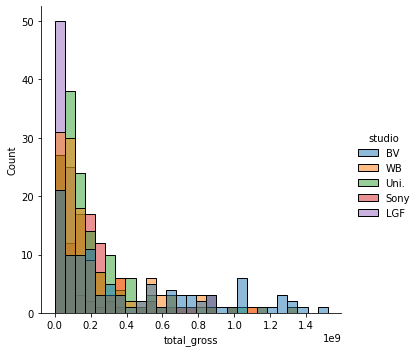

In [483]:
import seaborn as sns
sns.displot(x = 'total_gross', data =studio_hist_df, hue = 'studio', alpha = .5)

In [ ]:
gross_df2.nlargest(20,['total_gross'])

In [ ]:
movie_data_df5 = movie_data_df3[movie_data_df3.title != 'Fan']
movie_data_df5

In [ ]:
movie_data_df5.nlargest(20,['runtime_minutes'])

In [ ]:
movie_data_df5.nsmallest(20,['runtime_minutes'])

In [ ]:
movie_data_df7 = movie_data_df3[movie_data_df3.runtime_minutes >= 60.0]
movie_data_df7

In [ ]:
movie_data_df7 = movie_data_df7[movie_data_df3.runtime_minutes <= 200.0]
movie_data_df7

In [ ]:
movie_data_df7.nlargest(20,['runtime_minutes'])

In [ ]:
movie_data_df5.describe()

In [ ]:
movie_data_df9.groupby('total_gross')['runtime_minutes'].mean()

In [ ]:
movie_data_df8 = movie_data_df5[movie_data_df5.runtime_minutes <= 119.0]
movie_data_df8

In [ ]:
movie_data_df9 = movie_data_df8[movie_data_df8.runtime_minutes >= 91.0]
movie_data_df9

In [ ]:
top_studios2= movie_data_df7.nlargest(20,['total_gross'])['studio'].value_counts()
top_studios2

In [ ]:
movie_data_df7.head()

In [ ]:
studio_hist_df2 = movie_data_df7[movie_data_df7['studio'].isin(top_studios2.index)]
studio_hist_df2

In [ ]:
BV_rt_df = studio_hist_df2.loc[studio_hist_df2['studio'] == 'BV']

In [ ]:
BV_rt_df.nlargest(20,['runtime_minutes'])

In [ ]:
studio_hist_df2['color'] = np.where(studio_hist_df2['studio'] == 'BV', 'red', 'orange')

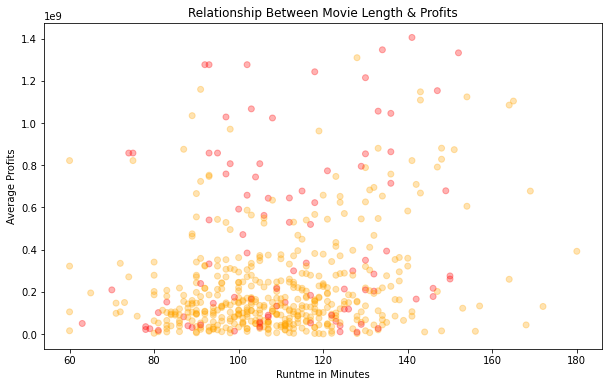

In [482]:
scatter_plot_title = 'Relationship Between Movie Length & Profits'
profits_label = 'Runtme in Minutes'
ratings_label = 'Average Profits'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(
    x=studio_hist_df2['runtime_minutes'],
    y=studio_hist_df2['total_gross'],
    color=studio_hist_df2['color'],
    alpha=0.3

)

ax.set_xlabel(profits_label)
ax.set_ylabel(ratings_label)
ax.set_title(scatter_plot_title);

In [ ]:
scatter_plot_title = 'Relationship Between Movie Length & Profits'
profits_label = 'Runtme in Minutes'
ratings_label = 'Average Profits'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(
    x=movie_data_df7['runtime_minutes'],
    y=movie_data_df7['total_gross'],
    color=movie_data_df7['color'],
    alpha=0.3

)

ax.set_xlabel(profits_label)
ax.set_ylabel(ratings_label)
ax.set_title(scatter_plot_title);

In [ ]:
movie_data_df3.nlargest(20,['total_gross'])

In [ ]:
movie_data_df3.sort_values("title", inplace = True)
 
# making a bool series
bool_series = movie_data_df3["title"].duplicated()
 
# displaying data
movie_data_df3.head()
 
# display data
movie_data_df3[bool_series]

In [ ]:
movie_data_df3.duplicated(subset='title', keep='last')

In [ ]:
movie_data_df3.loc[movie_data_df3['genres'] == 'Documentary,Drama,Sport']

In [ ]:
movie_data_df4 = movie_data_df3[movie_data_df3.title != 'Frozen']
movie_data_df4

In [ ]:
mprof_genres_df = movie_data_df4.groupby('genres')['total_gross'].mean()
mprof_genres_df

In [ ]:
mprof_genres_df2 = mprof_genres_df.nlargest(20,)
mprof_genres_df2

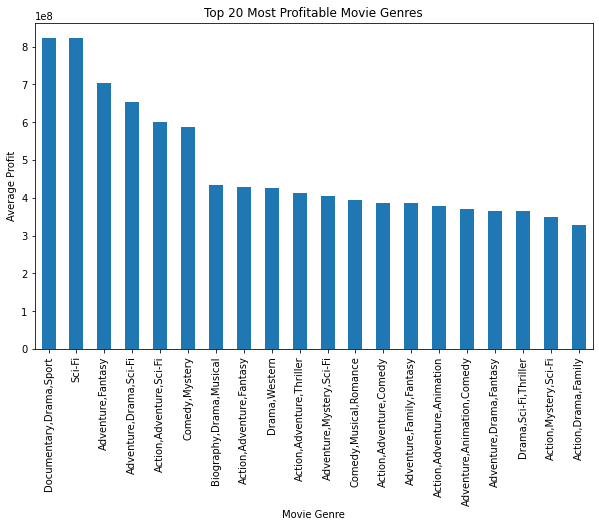

In [481]:
bar_chart_title = 'Top 20 Most Profitable Movie Genres'
bar_chart_count_label = 'Average Profit'
bar_chart_series_label = 'Movie Genre'


fig, ax = plt.subplots(figsize=(10, 6))
mprof_genres_df2.plot(kind = 'bar', ax = ax)

ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
ax.set_title(bar_chart_title)
plt.show()

# Top genres by profit

In [ ]:
prof_genres_df = movie_gg_df.groupby('genres')['bud_gross_diff'].mean()
prof_genres_df

In [ ]:
prof_genres_df2 = prof_genres_df.nlargest(20,)
prof_genres_df2

In [ ]:
bar_chart_title = 'Top 20 Most Profitable Movie Genres'
bar_chart_count_label = 'Average Profit'
bar_chart_series_label = 'Movie Genre'


fig, ax = plt.subplots(figsize=(10, 6))
prof_genres_df2.plot(kind = 'bar', ax = ax)

ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
ax.set_title(bar_chart_title)
plt.show()

In [ ]:
movie_gg_df.value_counts('start_year')

In [ ]:
movie_gg_df

In [ ]:
studio_bud_df = pd.merge(gross_df2, budgets_df2, how='inner', on=['title'])
studio_bud_df

In [ ]:
BV_bud = studio_bud_df.loc[studio_bud_df['studio'] == 'BV']
BV_bud

In [ ]:
BV_bud.nlargest(5,'production_budget')

In [ ]:
BV_bud.nsmallest(5,'production_budget')

In [ ]:
BV_bud['production_budget'].mean()

# Top genres by rating

In [ ]:
genre_ar = df3.groupby('genres')['averagerating'].mean()
genre_ar

In [ ]:
genre_ar2 = genre_ar.nlargest(20,)
genre_ar2

In [ ]:
bar_chart_title = 'Top 20 Rated Movie Genres'
bar_chart_count_label = 'Average Rating Out of 10'
bar_chart_series_label = 'Movie Genre'


fig, ax = plt.subplots(figsize=(10, 6))
genre_ar2.plot(kind = 'bar', ax = ax)

ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
ax.set_title(bar_chart_title)
plt.show()

In [ ]:
df3_ex = df3.explode('genres', ignore_index = False)
df3_ex

# Genres profit v rating

In [ ]:
genre_pr_df = pd.merge(prof_genres_df, genre_ar, how='inner', on=['genres'])
genre_pr_df

In [ ]:
scatter_plot_title = 'Relationship Between Average Profits and Ratings For Top 20 Movie Genres'
profits_label = 'Average Profits'
ratings_label = 'AVerage Ratings'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(
    x=prof_genres_df2,
    y=genre_ar2,
    alpha=0.3
)

ax.set_xlabel(profits_label)
ax.set_ylabel(ratings_label)
ax.set_title(scatter_plot_title);

# Most expensive genres to create

In [ ]:
# compare this with the amount of money each genre brought in?

In [ ]:
me_genre_df = movie_gg_df.groupby('genres')['production_budget'].mean()
me_genre_df

In [ ]:
me_genre_df2 = me_genre_df.nlargest(20,)
me_genre_df2

# Least expensive genres to create

In [ ]:
le_genre_df = me_genre_df.nsmallest(20,)
le_genre_df

# Comparison of cost of movie and profits by genre?

# Running time of most successful movies

In [ ]:
movie_gg_df.info()

In [ ]:
movie_grt_df = movie_gg_df.groupby('genres')['bud_gross_diff','runtime_minutes'].mean()
movie_grt_df

In [ ]:
movie_grt_df2 = movie_grt_df.nlargest(20,['bud_gross_diff'])
movie_grt_df2

# highest grossing movies for each year

In [ ]:
gross_df2.info()

In [ ]:
yr_high_gross = gross_df2.groupby('year')['total_gross'].mean()
yr_high_gross

In [ ]:
yr_high_gross2 = gross_df2.groupby('year')['title'].max('total_gross')
yr_high_gross2